<a href="https://colab.research.google.com/github/Zenologos/Praxis/blob/main/corey_praxis_data_analysis_LT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=dark red> Data Loading </font>

#### <font color=blue> Step 1 - Load EST 1 and EST 2 files. </font>

In [6]:
# Import data

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

columns_of_interest = ['device_number','device_description','site','work_order_number','work_order_priority_description','wo_type_description','problem_reported','lot_year','num_parts_from_storeroom','num_parts_from_po','repair_part_number','repair_part_name','repair_part_stocktype']

<font color = green> Additional Request for Milestone 1 added.</font>

In [7]:
len(columns_of_interest)

13

In [8]:
# Update file path below - Use repairable for live. System down and degraded is commented Need to check that it holds with SNS

df1 = pd.read_excel('NTC.xlsx')
df2 = pd.read_excel('JMRC.xlsx')

In [9]:
df1.shape

(77121, 56)

In [10]:
df2.shape

(22314, 35)

In [11]:
df1.columns

Index(['TFA', 'SUBTFA', 'SYSTEMID', 'DEVICE NUMBER', 'DEVICE DESCRIPTION',
       'DEVICE SERIAL NUMER', 'SITE', 'WORK ORDER NUMBER',
       'WORK ORDER DESCRIPTION', 'WORK ORDER PRIORITY DESCRIPTION',
       'WOTYPE_DESCRIPTION', 'FUNCTIONAL LOCATION DRILL DOWN',
       'FUNCTIONAL LOCATION DESCRIPTION', 'PROBLEMREPORTED', 'ACTIONCOMPLETED',
       'TIME TO RETURN (Days.% of 24hrs)', 'LOT YEAR',
       'AFFECTED PART UNIQUE IDENTIFIER', 'AFFECTED PART NUMBER',
       'AFFECTED PART NAME', 'AFFECTED PART SERIAL NUMBER',
       'MAINTENANCE ACTION', 'NUMPARTSFROMSTOREROOM', 'NUMPARTSFROMPO',
       'DATE SENT TO VENDOR', 'DATE RECEIVED FROM VENDOR',
       'REPAIR PART OWNERSHIP', 'REPAIR PART NUMBER', 'REPAIR PART NAME',
       'REPAIR PART SERIAL NUMBER', 'REPAIR PART STOCKTYPE', 'REPAIR CATEGORY',
       'REPAIR PART FARCODE', 'TOTAL WORK ORDER LABOR', 'LONG DESCRIPTION',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed:

In [12]:
df2.columns

Index(['TFA', 'SUBTFA', 'SYSTEMID', 'DEVICE NUMBER', 'DEVICE DESCRIPTION',
       'DEVICE SERIAL NUMER', 'SITE', 'WORK ORDER NUMBER',
       'WORK ORDER DESCRIPTION', 'WORK ORDER PRIORITY DESCRIPTION',
       'WOTYPE_DESCRIPTION', 'FUNCTIONAL LOCATION DRILL DOWN',
       'FUNCTIONAL LOCATION DESCRIPTION', 'PROBLEMREPORTED', 'ACTIONCOMPLETED',
       'TIME TO RETURN (Days.% of 24hrs)', 'LOT YEAR',
       'AFFECTED PART UNIQUE IDENTIFIER', 'AFFECTED PART NUMBER',
       'AFFECTED PART NAME', 'AFFECTED PART SERIAL NUMBER',
       'MAINTENANCE ACTION', 'NUMPARTSFROMSTOREROOM', 'NUMPARTSFROMPO',
       'DATE SENT TO VENDOR', 'DATE RECEIVED FROM VENDOR',
       'REPAIR PART OWNERSHIP', 'REPAIR PART NUMBER', 'REPAIR PART NAME',
       'REPAIR PART SERIAL NUMBER', 'REPAIR PART STOCKTYPE', 'REPAIR CATEGORY',
       'REPAIR PART FARCODE', 'TOTAL WORK ORDER LABOR', 'LONG DESCRIPTION'],
      dtype='object')

#### <font color=blue> Step 2 - Rename columns names by replacing whitespace with underscore, coverting to lowercase. </font>

In [13]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(" ","_")
df2.columns = df2.columns.str.strip().str.lower().str.replace(" ","_")

In [14]:
df1.columns

Index(['tfa', 'subtfa', 'systemid', 'device_number', 'device_description',
       'device_serial_numer', 'site', 'work_order_number',
       'work_order_description', 'work_order_priority_description',
       'wotype_description', 'functional_location_drill_down',
       'functional_location_description', 'problemreported', 'actioncompleted',
       'time_to_return_(days.%_of_24hrs)', 'lot_year',
       'affected_part_unique_identifier', 'affected_part_number',
       'affected_part_name', 'affected_part_serial_number',
       'maintenance_action', 'numpartsfromstoreroom', 'numpartsfrompo',
       'date_sent_to_vendor', 'date_received_from_vendor',
       'repair_part_ownership', 'repair_part_number', 'repair_part_name',
       'repair_part_serial_number', 'repair_part_stocktype', 'repair_category',
       'repair_part_farcode', 'total_work_order_labor', 'long_description',
       'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38',
       'unnamed:_39', 'unnamed:_40', 'unnamed:

In [15]:
df1 = df1.rename({'wotype_description':'wo_type_description','problemreported':'problem_reported',\
           'numpartsfromstoreroom':'num_parts_from_storeroom','numpartsfrompo':'num_parts_from_po'},axis='columns',errors="raise")
df2 = df2.rename({'wotype_description':'wo_type_description','problemreported':'problem_reported',\
           'numpartsfromstoreroom':'num_parts_from_storeroom','numpartsfrompo':'num_parts_from_po'},axis='columns',errors="raise")

In [16]:
df1.columns

Index(['tfa', 'subtfa', 'systemid', 'device_number', 'device_description',
       'device_serial_numer', 'site', 'work_order_number',
       'work_order_description', 'work_order_priority_description',
       'wo_type_description', 'functional_location_drill_down',
       'functional_location_description', 'problem_reported',
       'actioncompleted', 'time_to_return_(days.%_of_24hrs)', 'lot_year',
       'affected_part_unique_identifier', 'affected_part_number',
       'affected_part_name', 'affected_part_serial_number',
       'maintenance_action', 'num_parts_from_storeroom', 'num_parts_from_po',
       'date_sent_to_vendor', 'date_received_from_vendor',
       'repair_part_ownership', 'repair_part_number', 'repair_part_name',
       'repair_part_serial_number', 'repair_part_stocktype', 'repair_category',
       'repair_part_farcode', 'total_work_order_labor', 'long_description',
       'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38',
       'unnamed:_39', 'unnamed:_40', '

#### <font color=blue> Step 3 - Filter out unwanted columns from dataframes. </font>

In [17]:
df1_new = df1[df1.columns.intersection(columns_of_interest)].copy()
df2_new = df2[df2.columns.intersection(columns_of_interest)].copy()

In [18]:
df1_new.columns

Index(['device_number', 'device_description', 'site', 'work_order_number',
       'work_order_priority_description', 'wo_type_description',
       'problem_reported', 'lot_year', 'num_parts_from_storeroom',
       'num_parts_from_po', 'repair_part_number', 'repair_part_name',
       'repair_part_stocktype'],
      dtype='object')

In [19]:
len(df1_new.columns)

13

In [20]:
df1_new.shape

(77121, 13)

In [21]:
len(df2_new.columns)

13

In [22]:
df2_new.columns

Index(['device_number', 'device_description', 'site', 'work_order_number',
       'work_order_priority_description', 'wo_type_description',
       'problem_reported', 'lot_year', 'num_parts_from_storeroom',
       'num_parts_from_po', 'repair_part_number', 'repair_part_name',
       'repair_part_stocktype'],
      dtype='object')

In [23]:
df2_new.shape

(22314, 13)

#### <font color=blue> Step 4 - Concatenate the two datasets </font>

In [24]:
type(df2_new)

pandas.core.frame.DataFrame

In [25]:
df_main = pd.concat([df1_new,df2_new],axis=0,ignore_index = True)

In [26]:
df_main.shape

(99435, 13)

In [27]:
df_main.head()

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name,repair_part_stocktype
0,71-11,NTC Instrumentation System,"Ft Irwin, CA",5197810,Bench/Depot Repair,Corrective COR,2012-05-06,4,0,0,No parts issued to workorder,No parts issued to workorder,No Parts Issued from Inventory
1,71-11,NTC Instrumentation System,"Ft Irwin, CA",5215505,Bench/Depot Repair,Corrective COR,2012-05-17,4,0,0,No parts issued to workorder,No parts issued to workorder,No Parts Issued from Inventory
2,71-11,NTC Instrumentation System,"Ft Irwin, CA",5215504,Bench/Depot Repair,Corrective COR,2012-05-17,4,0,0,No parts issued to workorder,No parts issued to workorder,No Parts Issued from Inventory
3,71-11,NTC Instrumentation System,"Ft Irwin, CA",5215503,Bench/Depot Repair,Corrective COR,2012-05-17,4,0,0,No parts issued to workorder,No parts issued to workorder,No Parts Issued from Inventory
4,71-11,NTC Instrumentation System,"Ft Irwin, CA",5215501,Bench/Depot Repair,Corrective COR,2012-05-17,4,0,0,No parts issued to workorder,No parts issued to workorder,No Parts Issued from Inventory


## <font color=dark red> Data Cleansing </font>

#### <font color=blue> Step 1 - Convert problem_reported column to date column. The column values are already of datetime type.</font>

In [28]:
df_main['problem_reported'], type(df_main['problem_reported'])

(0       2012-05-06 00:00:00
 1       2012-05-17 00:00:00
 2       2012-05-17 00:00:00
 3       2012-05-17 00:00:00
 4       2012-05-17 00:00:00
                 ...        
 99430   2013-01-08 04:59:50
 99431   2012-06-21 07:53:56
 99432   2012-08-08 00:32:52
 99433   2012-05-14 08:13:55
 99434   2012-11-28 03:27:59
 Name: problem_reported, Length: 99435, dtype: datetime64[ns],
 pandas.core.series.Series)

In [29]:
df_main['problem_reported'] = df_main.problem_reported.dt.date

In [30]:
df_main['problem_reported']

0        2012-05-06
1        2012-05-17
2        2012-05-17
3        2012-05-17
4        2012-05-17
            ...    
99430    2013-01-08
99431    2012-06-21
99432    2012-08-08
99433    2012-05-14
99434    2012-11-28
Name: problem_reported, Length: 99435, dtype: object

In [31]:
# df_main = df_main.rename({'problem_reported':'date'},axis='columns',errors="raise")

In [32]:
df_main['problem_reported']

0        2012-05-06
1        2012-05-17
2        2012-05-17
3        2012-05-17
4        2012-05-17
            ...    
99430    2013-01-08
99431    2012-06-21
99432    2012-08-08
99433    2012-05-14
99434    2012-11-28
Name: problem_reported, Length: 99435, dtype: object

#### <font color=blue> Step 2 - Removing all records that have a description of 'Modification Government' & 'Operational Support' & 'Exercise Support' & 'Log Problem' & 'Operational Support'.</font>
<font color = green> Additional Request for Milestone 1 added.</font>

In [33]:
df_main.wo_type_description.unique()

array(['Corrective COR', 'Exercise Support', 'Operational Support',
       'Preventive PM', 'Modification Government'], dtype=object)

In [34]:
df_main.shape

(99435, 13)

In [35]:
df_main = df_main.drop(df_main.index[df_main['wo_type_description'].str.
                                     contains('Modification Government|Operational Support|Exercise Support|Log Problem|Operational Support', na=False)])

In [36]:
df_main.shape

(85656, 13)

In [37]:
df_main.wo_type_description.unique()

array(['Corrective COR', 'Preventive PM'], dtype=object)

#### <font color=blue> Step 3 - Removing all rows that have values of 'Move/Modify/Upgrade' & 'Exercise/Operational Support' in the 'work_order_priority_description' column. </font>

<font color = green> Additional Request for Milestone 1 added.</font>

In [38]:
df_main.work_order_priority_description.unique()

array(['Bench/Depot Repair', 'Corrective Maintenance', 'PMCS',
       'System - Device Degraded', 'System - Device Down'], dtype=object)

In [39]:
df_main.shape

(85656, 13)

In [40]:
df_main = df_main.drop(df_main.index[df_main['work_order_priority_description'].str.contains('Move/Modify/Upgrade|Exercise/Operational Support', na=False)])

In [41]:
df_main.shape

(85656, 13)

In [42]:
df_main.work_order_priority_description.unique()

array(['Bench/Depot Repair', 'Corrective Maintenance', 'PMCS',
       'System - Device Degraded', 'System - Device Down'], dtype=object)

#### <font color=blue> Step 4 - Removing all rows that have values of 'No parts issued to workorder'in the 'repair_part_number' column. </font>

In [43]:
df_main.repair_part_number.unique()

array(['No parts issued to workorder', '1210 AW-6', '290135-1', ...,
       'DCH-500P-S2-IP', 'ENC-300-HDSDI', 'IP-6610-E120-4ETH-BR'],
      dtype=object)

In [44]:
df_main = df_main.drop(df_main.index[df_main['repair_part_number'].str.contains('No parts issued to workorder', na=False)])

In [45]:
df_main.shape

(42506, 13)

#### <font color=blue> Before we move onto the next step, lets check for nan values.</font>

In [46]:
df_main.tail()

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name,repair_part_stocktype
98193,71-06,JMRC Instrumentation System,Germany - Hohenfels,6181845,Corrective Maintenance,Corrective COR,2014-03-17,5,1,0,60-336-11,"SWITCHER, CROSSPOINT450 PLUS 88 HVA",REPAIRABLE
98256,71-06,JMRC Instrumentation System,Germany - Hohenfels,6156674,PMCS,Preventive PM,2014-03-03,5,1,0,DCH-500P-S2-IP,1 RU RACKMOUNT HDTV PROCESSOR FOR H264 AND MPE...,CONSUMABLE
98257,71-06,JMRC Instrumentation System,Germany - Hohenfels,6156674,PMCS,Preventive PM,2014-03-03,5,1,0,ENC-300-HDSDI,H.264 HD/SD ENCODER BLADE WITH SDI,CONSUMABLE
99208,71-06,JMRC Instrumentation System,Germany - Hohenfels,DR5971923,Bench/Depot Repair,Corrective COR,2013-10-11,5,1,0,MS27144-2,"Connector, Plug, Electrical-Socket Contact",CONSUMABLE
99315,71-06,JMRC Instrumentation System,Germany - Hohenfels,6750646,Corrective Maintenance,Corrective COR,2015-03-26,6,1,0,IP-6610-E120-4ETH-BR,4 Port Ethernet Bridge Router,CONSUMABLE


In [47]:
# for col in df_main:
#     print(df_main[col].name,'=',df_main[col].unique())

df_main.isnull().sum()

device_number                      0
device_description                 0
site                               0
work_order_number                  0
work_order_priority_description    0
wo_type_description                0
problem_reported                   0
lot_year                           0
num_parts_from_storeroom           0
num_parts_from_po                  0
repair_part_number                 0
repair_part_name                   0
repair_part_stocktype              0
dtype: int64

In [48]:
# lets remove the two rows with nan values.
df_main = df_main.dropna(axis=0)

In [49]:
df_main.shape

(42506, 13)

## <font color=dark red> Reporting </font>

#### <font color=blue> Generating a view that displays the number of remaining records.</font>

In [50]:
total_records = df_main.shape[0]

In [58]:
total_records

42506

In [59]:
wo_typedesc_df = df_main['wo_type_description'].value_counts().to_frame()

In [60]:
wo_typedesc_df

,wo_type_description
Corrective COR,33318
Preventive PM,9188


In [61]:
wo_prioritydesc_df = df_main['work_order_priority_description'].value_counts().to_frame()

In [62]:
wo_prioritydesc_df

,work_order_priority_description
Corrective Maintenance,23596
Bench/Depot Repair,9722
PMCS,9188


In [56]:
# Set label size for plots
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
sns.set_context("poster")
# plt.rcParams.update({'font.size': 10})

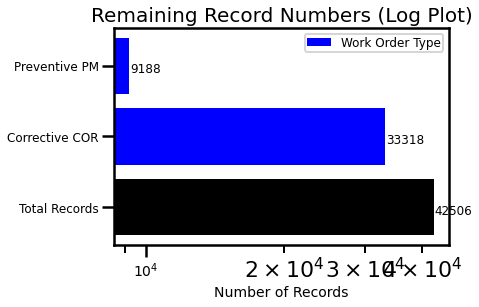

In [67]:
plt.barh('Total Records',total_records, color = 'k',log=True)
plt.barh('Corrective COR',wo_typedesc_df.loc['Corrective COR'][0],color = 'b',label = 'Work Order Type')
plt.barh('Preventive PM',wo_typedesc_df.loc['Preventive PM'][0],color = 'b')
#plt.barh('System - Device Down',wo_prioritydesc_df.loc['System - Device Down'][0],color = 'r',label = 'Work Order Priority')
#plt.barh('System - Device Degraded',wo_prioritydesc_df.loc['System - Device Degraded'][0],color = 'r')

values = [total_records,wo_typedesc_df.loc['Corrective COR'][0],wo_typedesc_df.loc['Preventive PM'][0]]
          #wo_prioritydesc_df.loc['System - Device Down'][0],wo_prioritydesc_df.loc['System - Device Degraded'][0]]
i = 1
j = 50
for i in range(len(values)):
    plt.annotate(values[i], (values[i] + j, -0.1 + i), fontsize=12)

plt.title('Remaining Record Numbers (Log Plot)',fontsize=20)
plt.xlabel('Number of Records',fontsize=14)
plt.legend(borderpad=0.2,prop={'size':12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
# plt.xlim(0,10^6)
# plt.figsize=(20, 20)
# plt.savefig('Remaining_Records.png',dpi=120, facecolor='w',orientation='potrait', bbox_inches="tight")
plt.show()

## <font color=dark red> Exploratory Data Analysis (EDA) </font>

#### <font color=blue> Step 1 - Generating a view that displays the minimum and maximum Problem Reported Dates.</font>

In [68]:
# Earliest and latest problem reported dates for all the records

df_main['problem_reported'].agg(['min','max'])

min    2011-07-31
max    2015-07-16
Name: problem_reported, dtype: object

In [69]:
# The least number of problems reported for any day was 1 , and the maximum number of problems were reported
# on March 3, 2014. A total of 311 problems reported.

df_main['problem_reported'].value_counts(ascending=True)

2013-04-06      1
2014-02-22      1
2013-12-15      1
2013-01-27      1
2015-01-18      1
             ... 
2015-02-03    165
2015-01-30    168
2013-07-17    189
2013-11-26    235
2014-02-21    321
Name: problem_reported, Length: 976, dtype: int64

In [70]:
#Earliest and latest problem reported dates for records in 'wo_type_description' group.
df_main.groupby('wo_type_description').problem_reported.agg(['min','max'])

,min,max
wo_type_description,,
Corrective COR,2011-07-31,2015-07-16
Preventive PM,2011-12-03,2015-05-11


In [71]:
#Earliest and latest problem reported dates for records in 'work_order_priority_description' group.
df_main.groupby('work_order_priority_description').problem_reported.agg(['min','max'])

,min,max
work_order_priority_description,,
Bench/Depot Repair,2012-02-29,2015-07-16
Corrective Maintenance,2011-07-31,2015-05-13
PMCS,2011-12-03,2015-05-11


#### <font color=blue> Step 2 - Generating a view that displays the total parts used by adding 'num_parts_from_storeroom' + 'num_parts_from_po'.</font>

In [72]:
df_main['total_parts_used'] = df_main['num_parts_from_storeroom'] + df_main['num_parts_from_po']

In [73]:
#Additional column added with the name 'total_parts_used'
df_main.shape

(42506, 14)

In [74]:
df_main['repair_part_stocktype'].unique()

array(['CONSUMABLE', 'REPAIRABLE', 'No Parts Issued from Inventory'],
      dtype=object)

In [75]:
df_main.groupby(['wo_type_description']).total_parts_used.sum().to_frame()

,total_parts_used
wo_type_description,
Corrective COR,145137
Preventive PM,20532


<font color = green> Additional Request for Milestone 1 added.</font>

In [76]:
df_main.groupby(['wo_type_description','repair_part_stocktype']).total_parts_used.sum().to_frame()

total_parts_used
wo_type_description repair_part_stocktype                           
Corrective COR      CONSUMABLE                                132235
                    No Parts Issued from Inventory              5561
                    REPAIRABLE                                  7341
Preventive PM       CONSUMABLE                                 20304
                    No Parts Issued from Inventory               200
                    REPAIRABLE                                    28

In [77]:
df_main.groupby('work_order_priority_description').total_parts_used.sum().to_frame()

,total_parts_used
work_order_priority_description,
Bench/Depot Repair,21939
Corrective Maintenance,123198
PMCS,20532


<font color = green> Additional Request for Milestone 1 added.</font>

In [78]:
df_main.groupby(['work_order_priority_description','repair_part_stocktype']).total_parts_used.sum().to_frame()

total_parts_used
work_order_priority_description repair_part_stocktype                           
Bench/Depot Repair              CONSUMABLE                                 18613
                                No Parts Issued from Inventory                 1
                                REPAIRABLE                                  3325
Corrective Maintenance          CONSUMABLE                                113622
                                No Parts Issued from Inventory              5560
                                REPAIRABLE                                  4016
PMCS                            CONSUMABLE                                 20304
                                No Parts Issued from Inventory               200
                                REPAIRABLE                                    28

#### <font color=blue> Step 3 - Generating a view that displays the count of different parts used by distinct 'repair_part_number'.</font>

In [79]:
pd.set_option('display.max_rows',10)

In [80]:
df_main.groupby('wo_type_description').repair_part_number.value_counts().to_frame()

repair_part_number
wo_type_description repair_part_number                    
Corrective COR      SP12V100MT                        3747
                    CAM-CAL-205G-095                  2214
                    112901-001LF                      1931
                    SPM030P-A                         1178
                    800-009-16ZN9-19SN                1027
...                                                    ...
Preventive PM       W706599-S439                         1
                    XT-5-QMC                             1
                    XT-6-QSP                             1
                    XU5Z-9030-MA                         1
                    YC3Z2268AA                           1

[3816 rows x 1 columns]

In [82]:
df_main.groupby('work_order_priority_description').repair_part_number.value_counts().to_frame()

repair_part_number
work_order_priority_description repair_part_number                           
Bench/Depot Repair              SP12V100MT                               1867
                                112901-001LF                             1002
                                LK162-12E                                 758
                                RAYTHEON MEMBRANE CIRCUIT                 586
                                SPM030P-A                                 490
...                                                                       ...
PMCS                            W706599-S439                                1
                                XT-5-QMC                                    1
                                XT-6-QSP                                    1
                                XU5Z-9030-MA                                1
                                YC3Z2268AA                                  1

[3948 rows x 1 columns]

## <font color=dark red> Data Preparation  </font>

#### <font color=blue> Step 1 - Creating 4 new columns for Demand Interval. Abbreviate to DI-COR, DI-PM, DI-NMC, DI-PMC</font>

In [83]:
df_main

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name,repair_part_stocktype,total_parts_used
38,71-11,NTC Instrumentation System,"Ft Irwin, CA",5469134,Corrective Maintenance,Corrective COR,2012-11-02,4,1,0,1210 AW-6,"ANTENNA, GPS w/6"" CABLE AND SMA CONNECTORS",CONSUMABLE,1
39,71-11,NTC Instrumentation System,"Ft Irwin, CA",5197349,Corrective Maintenance,Corrective COR,2012-05-04,4,1,0,290135-1,"PROCESSOR, CCA",CONSUMABLE,1
40,71-11,NTC Instrumentation System,"Ft Irwin, CA",5710321,Bench/Depot Repair,Corrective COR,2013-04-17,4,1,0,PT06A14-15S-SR,"PLG STRT, W S/R 14.14#20.1#16 GLD PLTD SDR SCT...",CONSUMABLE,1
43,71-11,NTC Instrumentation System,"Ft Irwin, CA",5356867,Corrective Maintenance,Corrective COR,2012-08-23,4,1,0,GXT2-7A48BATKIT,"BATTERY, UPS, REPLACEMENT INTERNAL",CONSUMABLE,1
50,71-11,NTC Instrumentation System,"Ft Irwin, CA",5221997,Corrective Maintenance,Corrective COR,2012-05-21,4,1,0,162330,"PROCESSOR, CCA, VDD",REPAIRABLE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98193,71-06,JMRC Instrumentation System,Germany - Hohenfels,6181845,Corrective Maintenance,Corrective COR,2014-03-17,5,1,0,60-336-11,"SWITCHER, CROSSPOINT450 PLUS 88 HVA",REPAIRABLE,1
98256,71-06,JMRC Instrumentation System,Germany - Hohenfels,6156674,PMCS,Preventive PM,2014-03-03,5,1,0,DCH-500P-S2-IP,1 RU RACKMOUNT HDTV PROCESSOR FOR H264 AND MPE...,CONSUMABLE,1
98257,71-06,JMRC Instrumentation System,Germany - Hohenfels,6156674,PMCS,Preventive PM,2014-03-03,5,1,0,ENC-300-HDSDI,H.264 HD/SD ENCODER BLADE WITH SDI,CONSUMABLE,1
99208,71-06,JMRC Instrumentation System,Germany - Hohenfels,DR5971923,Bench/Depot Repair,Corrective COR,2013-10-11,5,1,0,MS27144-2,"Connector, Plug, Electrical-Socket Contact",CONSUMABLE,1


In [84]:
# # Lets create separate dataframes for COR, PM, NMC, PMC for convenience and subsequent plotting of Demand Intervals. 

df_cor = df_main[df_main.wo_type_description.str.contains('Corrective COR')].copy()
df_pm = df_main[df_main.wo_type_description.str.contains('Preventive PM')].copy()
df_nmc = df_main[df_main.work_order_priority_description.str.contains('System - Device Down')].copy()
df_pmc = df_main[df_main.work_order_priority_description.str.contains('System - Device Degraded')].copy()

#### <font color=blue> Step 2 - Sort by problem_reported.</font>

In [85]:
df_cor

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name,repair_part_stocktype,total_parts_used
38,71-11,NTC Instrumentation System,"Ft Irwin, CA",5469134,Corrective Maintenance,Corrective COR,2012-11-02,4,1,0,1210 AW-6,"ANTENNA, GPS w/6"" CABLE AND SMA CONNECTORS",CONSUMABLE,1
39,71-11,NTC Instrumentation System,"Ft Irwin, CA",5197349,Corrective Maintenance,Corrective COR,2012-05-04,4,1,0,290135-1,"PROCESSOR, CCA",CONSUMABLE,1
40,71-11,NTC Instrumentation System,"Ft Irwin, CA",5710321,Bench/Depot Repair,Corrective COR,2013-04-17,4,1,0,PT06A14-15S-SR,"PLG STRT, W S/R 14.14#20.1#16 GLD PLTD SDR SCT...",CONSUMABLE,1
43,71-11,NTC Instrumentation System,"Ft Irwin, CA",5356867,Corrective Maintenance,Corrective COR,2012-08-23,4,1,0,GXT2-7A48BATKIT,"BATTERY, UPS, REPLACEMENT INTERNAL",CONSUMABLE,1
50,71-11,NTC Instrumentation System,"Ft Irwin, CA",5221997,Corrective Maintenance,Corrective COR,2012-05-21,4,1,0,162330,"PROCESSOR, CCA, VDD",REPAIRABLE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97894,71-06,JMRC Instrumentation System,Germany - Hohenfels,DR6510365,Bench/Depot Repair,Corrective COR,2014-10-10,6,1,0,MS27144-2,"CONNECTOR, PLUG, ELECTRICAL, MILITARY STANDARDS",CONSUMABLE,1
98152,71-06,JMRC Instrumentation System,Germany - Hohenfels,6013482,Corrective Maintenance,Corrective COR,2013-11-13,5,1,0,T23-129-075-1,"LCD, 24 push-button keys, rack mount (2 RU)",REPAIRABLE,1
98193,71-06,JMRC Instrumentation System,Germany - Hohenfels,6181845,Corrective Maintenance,Corrective COR,2014-03-17,5,1,0,60-336-11,"SWITCHER, CROSSPOINT450 PLUS 88 HVA",REPAIRABLE,1
99208,71-06,JMRC Instrumentation System,Germany - Hohenfels,DR5971923,Bench/Depot Repair,Corrective COR,2013-10-11,5,1,0,MS27144-2,"Connector, Plug, Electrical-Socket Contact",CONSUMABLE,1


In [86]:
df_cor = df_cor.sort_values('problem_reported').copy()
df_pm = df_pm.sort_values('problem_reported').copy()
df_nmc = df_nmc.sort_values('problem_reported').copy()
df_pmc = df_pmc.sort_values('problem_reported').copy()

## <font color=dark red>Exploratory Data Analysis</font>

#### <font color="blue">Step 1 - Calculate time interval between problem_reported dates.</font>

In [87]:
# I have named the demand interval columns using lowercase and underscore. 
# Let me know if you want to change it to what you suggested (DI-COR etc.)

In [88]:
df_cor['demand_interval_cor'] = df_cor['problem_reported'].diff() / np.timedelta64(1, 'M')
df_pm['demand_interval_pm'] = df_pm['problem_reported'].diff() / np.timedelta64(7, 'D')
df_nmc['demand_interval_nmc'] = df_nmc['problem_reported'].diff() / np.timedelta64(7, 'D')
df_pmc['demand_interval_pmc'] = df_pmc['problem_reported'].diff() / np.timedelta64(7, 'D')

In [89]:
df_cor['demand_interval_cor'].unique(), df_cor.shape

(array([       nan, 1.70845397, 0.        , 0.03285488, 3.35119818,
        0.68995257, 0.42711349, 0.78851722, 0.36140372, 0.32854884,
        0.75566233, 0.09856465, 0.13141954, 0.06570977, 0.16427442,
        0.39425861, 0.1971293 , 2.10271258]), (33318, 15))

In [90]:
df_pm['demand_interval_pm'].unique(), df_pm.shape

(array([        nan,  0.        ,  0.14285714,  4.71428571, 10.14285714,
         6.14285714,  0.42857143,  0.28571429,  1.42857143,  0.71428571,
         1.85714286,  0.57142857,  0.85714286,  1.57142857]), (9188, 15))

In [91]:
df_nmc['demand_interval_nmc'].unique(), df_nmc.shape

(array([], dtype=float64), (0, 15))

In [92]:
df_pmc['demand_interval_pmc'].unique(), df_pmc.shape

(array([], dtype=float64), (0, 15))

#### <font color="blue">Step 2 - Scatter Plot of Interval and Size (Raw Numbers no averages for this plot) </font>

In [93]:
sns.set_context("poster")


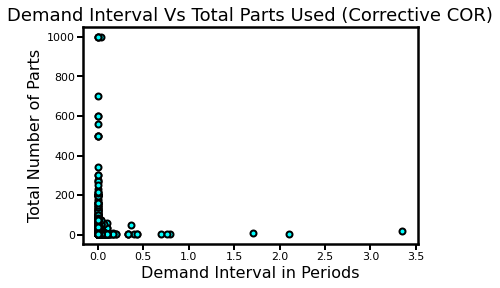

In [94]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df_cor['demand_interval_cor'],df_cor['total_parts_used'], c='aqua',marker='.',edgecolor='k');
ax.set_title('Demand Interval Vs Total Parts Used (Corrective COR)',size=18);
ax.set_ylabel('Total Number of Parts', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=11, pad=1.5)
# ax.set_xscale('log')
# ax.axis(xmin=0,xmax=0.0001)

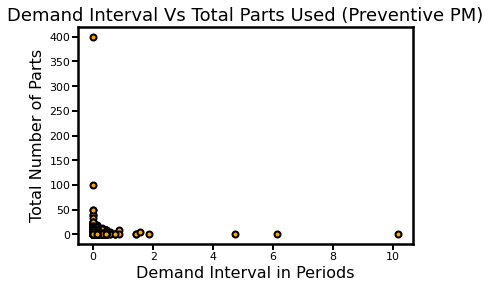

In [95]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df_pm['demand_interval_pm'],df_pm['total_parts_used'], c='orange',marker='.',edgecolor='k')
ax.set_title('Demand Interval Vs Total Parts Used (Preventive PM)',size=18);
ax.set_ylabel('Total Number of Parts', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=11, pad=1.5);

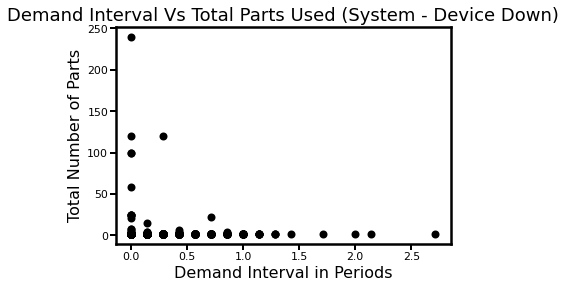

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df_nmc['demand_interval_nmc'],df_nmc['total_parts_used'], c='k',marker='.',edgecolor='k')
ax.set_title('Demand Interval Vs Total Parts Used (System - Device Down)',size=18);
ax.set_ylabel('Total Number of Parts', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=11, pad=1.5);

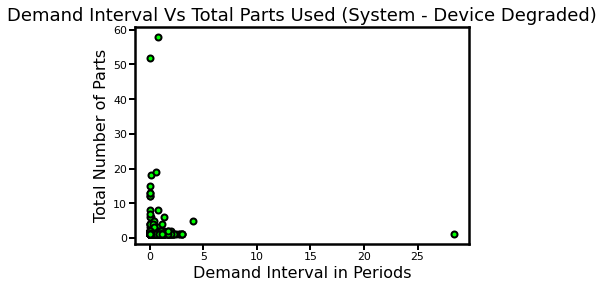

In [ ]:
fig = plt.figure()
ax = plt.gca()
# ax.set_xscale('log')
ax.scatter(df_pmc['demand_interval_pmc'],df_pmc['total_parts_used'], c='lime',marker='.',edgecolor='k')
ax.set_title('Demand Interval Vs Total Parts Used (System - Device Degraded)',size=18);
ax.set_ylabel('Total Number of Parts', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=11, pad=1.5);

#### <font color="blue">Step 3 - Looking for seasonality. </font>

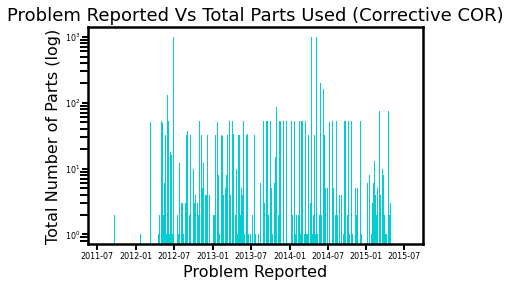

In [96]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df_cor['problem_reported'],df_cor['total_parts_used'],color='darkturquoise');
ax.set_title('Problem Reported Vs Total Parts Used (Corrective COR)',size=18);
ax.set_ylabel('Total Number of Parts (log)', fontsize = 16);
ax.set_xlabel('Problem Reported', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=8, pad=1.5)
ax.set_yscale('log');
# plt.scatter(df_cor['problem_reported'],df_cor['demand_interval_cor'])

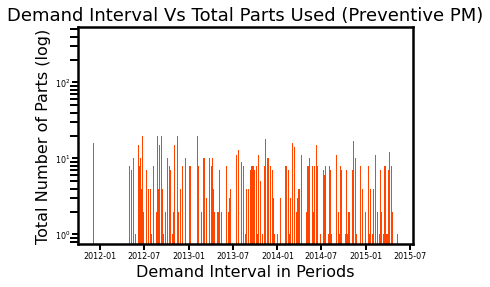

In [97]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df_pm['problem_reported'],df_pm['total_parts_used'], color='orangered');
ax.set_title('Demand Interval Vs Total Parts Used (Preventive PM)',size=18);
ax.set_ylabel('Total Number of Parts (log)', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=8, pad=1.5)
ax.set_yscale('log');

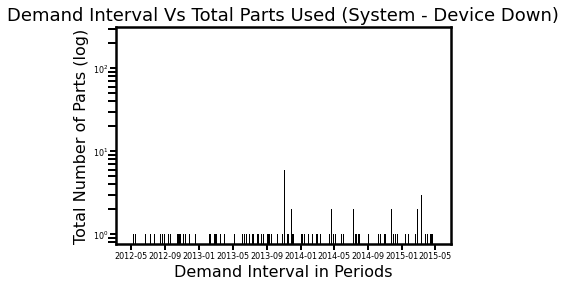

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df_nmc['problem_reported'],df_nmc['total_parts_used'], color='k');
ax.set_title('Demand Interval Vs Total Parts Used (System - Device Down)',size=18);
ax.set_ylabel('Total Number of Parts (log)', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=8, pad=1.5)
ax.set_yscale('log');

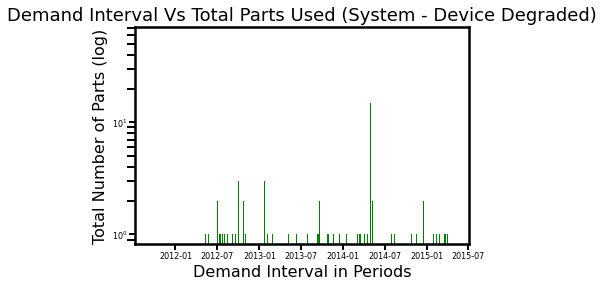

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df_pmc['problem_reported'],df_pmc['total_parts_used'], color='green');
ax.set_title('Demand Interval Vs Total Parts Used (System - Device Degraded)',size=18);
ax.set_ylabel('Total Number of Parts (log)', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=8, pad=1.5)
ax.set_yscale('log');

#### <font color="blue">Step 4 - Scatter Plot of ADI vs CV2 by group </font>